# Manufacturing_Defect EDA 목차

본 EDA는 모델링 목적이 아니라,
Snowflake 기반 Medallion Architecture에서
Bronze·Silver·Gold 단계 설계를 검증하기 위해 수행

---

## 1. 데이터 개요

- **데이터 출처**: Kaggle
- **데이터 설명**: 제조 환경에서 불량률에 영향을 미치는 요인에 대한 예측 데이터

---

## 2. 데이터 구조 및 스키마 탐색

- 컬럼 구성 및 데이터 타입 확인
- **Bronze CSV 테이블 구조 설계 기반 확보**

---

## 3. 데이터 품질 점검 (Data Quality)

- 결측값 및 중복 데이터 확인
- **Silver 단계 정제 대상 사전 식별**

---

## 4. 변수 간 관계 탐색

- 주요 변수 간 상관 관계 분석
- **Gold 단계 KPI 설계를 위한 인사이트 도출**


In [1]:
# 필요 라이브러리
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 데이터 구조 및 스키마 탐색
df = pd.read_csv(r"F:\sample_data\csv\manufacturing_defect_dataset.csv")
df.head()

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


# 데이터 구조
- ProductionVolume : 생산량
- ProductionCost : 생산 비용
- SupplierQuality : 공급 업체 품질
- DeliveryDelay : 납품 지연
- DefectRate : 불량률
- QualityScore : 품질 점수
- MaintenanceHours : 유지보수 시간
- DowntimePercentage : 다운타임 비율
- InventoryTurnover : 재고 회전율
- StockoutRate : 품절률
- WorkerProductivity : 노동자 생산성
- SafetyIncidents : 안전 사고
- EnergyConsumption : 에너지 소비량
- EnergyEfficiency : 에너지 효율성
- AdditiveProcessTime : 첨가 공정 시간
- AdditiveMaterialCost : 첨가 재료 비용
- DefectStatus : 불량 상태

## Kaggle 데이터셋 원본 컬럼 데이터 타입

> 본 데이터 타입은 Kaggle 데이터셋 **원본에 명시된 컬럼 데이터 타입**을 기준으로 하며,  
> 적재 전 원본 데이터 분포와 값 범위를 검토한 후 Snowflake 데이터 타입으로 **변경·확정**

| 컬럼명 | 데이터 타입 | 비고 |
|------|------------------|------|
| ProductionVolume | Integer | 생산량 |
| ProductionCost | Float | 생산 비용 |
| SupplierQuality |  Float(%) | 공급 업체 품질 |
| DeliveryDelay |  Integer(days) | 납품 지연 |
| DefectRate | Float | 불량률 |
| QualityScore |  Float(%) | 품질 점수 |
| MaintenanceHours | INTEGER |  유지보수 시간 |
| DowntimePercentage | Float(%) | 다운타임 비율 |
| InventoryTurnover | Float | 재고 회전율 |
| StockoutRate | Float(%) | 품절률 |
| WorkerProductivity | Float(%) | 노동자 생산성 |
| SafetyIncidents | Integer | 안전 사고 |
| EnergyConsumption | Float | 에너지 소비량 |
| EnergyEfficiency | Float | 에너지 소비량 |
| AdditiveProcessTime | Float(hours) | 첨가 공정 시간 |
| AdditiveMaterialCost | Float($) | 첨가 재료 비용 |
| DefectStatus | Binary (0 for Low Defects, 1 for High Defects) | 불량 상태 |

In [3]:
# 원본 데이터 스키마 및 컬럼 구조 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [4]:
# Snowflake 데이터 타입 설계를 위해 원본 데이터 값 확인
# 데이터 통계값 확인
df.describe(include="all")

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


## 최종 Snowflake Dtype
> 데이터 값의 범위를 기준으로 Snowflake 데이터 타입의 정밀도와 범위를 함께 지정

| 컬럼명 | 데이터 타입 | 범위 |
|------|------------------|------|
| ProductionVolume | NUMBER(10,0) | Integer (정수형) |
| ProductionCost | FLOAT | Float ($) (5000~20000) |
| SupplierQuality | FLOAT | Float (%) (80~100) |
| DeliveryDelay |  NUMBER(3,0) | Integer (0~5) |
| DefectRate | FLOAT | Float (0.5~5.0) |
| QualityScore | FLOAT | Float (%) (60~100) |
| MaintenanceHours | NUMBER(3,0) | Integer (0~24) |
| DowntimePercentage | FLOAT | Float (%) (0~5) |
| InventoryTurnover | FLOAT | Float (2~10) |
| StockoutRate | FLOAT | Float (%) (0~10) |
| WorkerProductivity | FLOAT | Float (%) (80~100) |
| SafetyIncidents | NUMBER(3,0) | Integer (0~10) |
| EnergyConsumption | FLOAT | Float (1000~5000) |
| EnergyEfficiency | FLOAT | Float (0.1~0.5) |
| AdditiveProcessTime | FLOAT | Float (1~10) |
| AdditiveMaterialCost | FLOAT | Float (100~500) |
| DefectStatus | BOOLEAN | Binary (0=Low, 1=High) |

## Medallion Architecture 설계를 위한 EDA

### Bronze Layer
- 원본 데이터를 **변형 없이 그대로 적재**
- Snowflake 적재를 위한 **데이터 타입 지정 및 스키마 정의** 수행

---

### Silver Layer
- 컬럼 정제 및 데이터 변환 수행
- 본 단계에서는 **데이터 파악 및 EDA까지만 진행**
- 실제 정제·변환 로직은 **Snowflake 기반으로 처리 예정**

---

### Gold Layer
- 분석 및 시각화 목적의 데이터 마트 구성
- Data Profiling & EDA 결과를 기반으로  
  **상관관계 분석 및 KPI 시각화 설계 진행**


In [5]:
# 컬럼별 고유값 분포 분석
df.nunique()

ProductionVolume         862
ProductionCost          3240
SupplierQuality         3240
DeliveryDelay              6
DefectRate              3240
QualityScore            3240
MaintenanceHours          24
DowntimePercentage      3240
InventoryTurnover       3240
StockoutRate            3240
WorkerProductivity      3240
SafetyIncidents           10
EnergyConsumption       3240
EnergyEfficiency        3240
AdditiveProcessTime     3240
AdditiveMaterialCost    3240
DefectStatus               2
dtype: int64

## Data Profiling 결과 요약

Data profiling을 통해 원본 데이터를 사전 분석한 결과, 다음과 같은 주요 특징을 확인
해당 내용은 이후 EDA 및 Snowflake 데이터 설계에 반영

---

### 1. 고유 식별자(PK) 컬럼 부재

- 전체 **17개 컬럼 중**, 각 행을 고유하게 식별할 수 있는 **Primary Key(PK) 컬럼이 존재하지 않음**
- 데이터 식별성 및 추적성 확보를 위해 **PK 컬럼 추가 필요**

 **EDA 반영**
- 기존에 분석했던 `hybrid_manufacturing_categorical.csv`의 `Job_ID`와 유사하게,  
  각 행을 고유하게 식별할 수 있는 **식별자 컬럼 `PRODUCTION_ID` 추가**

---

### 2. 다수 컬럼에서 높은 고유값 비율 확인

- 여러 컬럼에서 **고유값 비율이 매우 높게 나타남**
- 범주형보다는 **연속형 수치 데이터 특성**이 강함

**EDA 반영**
- 고유값 비율이 높은 원인 분석

---

### 3. 특정 컬럼에서 0 값 집중 현상

- 다음 컬럼들에서 0 값이 상대적으로 높은 비율로 관찰됨:
  - `DeliveryDelay`: 521건 (전체의 16.1%)
  - `MaintenanceHours`: 138건 (전체의 4.3%)
  - `SafetyIncidents`: 293건 (전체의 9.0%)

**EDA 반영**
- 0 값의 의미 정의 (정상값 / 미발생 / 결측 대체값)
- 분석 목적에 따라
  - 0 유지
  - NULL 변환

---

### 4. 목표 변수(DefectStatus) 중심 분석

- **DefectStatus**
  - `0` : 결함 수준 낮음
  - `1` : 결함 수준 높음
- 결함 수준(0 / 1)에 따른 **데이터 비율 확인**
- 결함 수준에 따라 주요 생산·운영·품질 지표의 **평균값 차이 분석**

**EDA 반영**
- **DefectStatus를 기준으로** 주요 변수 간 차이를 비교

## EDA 진행 방향

Data Profiling 결과를 바탕으로, EDA 단계에서는 다음 항목을 중점적으로 분석

- PK 컬럼 생성 전략 수립
- 컬럼별 고유값 분포 및 이상치 탐색
- 0 값 집중 컬럼의 원인 분석 및 처리 전략 결정
- **목표 변수(DefectStatus)를 중심으로 한 변수 간 관계 분석**

In [20]:
# 1. 각 행을 고유하게 식별할 수 있는 식별자 컬럼 `PRODUCTION_ID` 추가
def ensure_production_id(df):
    if "PRODUCTION_ID" not in df.columns:
        df = df.reset_index(drop=True)
        width = len(str(len(df)))  # 행 수 기준 자리수
        df.insert(
            0,
            "PRODUCTION_ID",
            "P" + (df.index + 1).astype(str).str.zfill(width)
        )
    return df
# PRODUCTION_ID 확인 
df = ensure_production_id(df)
df

,PRODUCTION_ID,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,P0001,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,P0002,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,P0003,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,P0004,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,P0005,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,P3236,762,11325.689263,89.252385,2,2.667570,87.141681,16,0.987719,3.574419,0.065727,95.917264,3,3288.043242,0.420186,4.733399,299.829577,0
3236,P3237,335,5598.837988,95.701437,4,0.751272,95.562997,11,0.178163,8.295295,0.097698,87.780846,8,2761.301593,0.126441,7.234421,245.524560,0
3237,P3238,835,11736.177712,96.431554,5,4.899756,77.973442,0,4.873429,3.844824,0.005724,81.590143,5,2000.621648,0.325530,5.436538,206.490010,1
3238,P3239,302,13664.196210,91.089782,1,4.057665,95.755591,6,0.071663,2.783298,0.042612,88.488525,6,1534.792169,0.222736,3.776924,203.771655,0


In [11]:
# 2. 다수 컬럼에서 높은 고유값 비율 확인
cols = [
    "ProductionCost", "SupplierQuality", "DefectRate", "QualityScore",
    "DowntimePercentage", "InventoryTurnover", "StockoutRate",
    "WorkerProductivity", "EnergyConsumption", "EnergyEfficiency",
    "AdditiveProcessTime", "AdditiveMaterialCost"
]

unique_ratio = (
    df[cols]
    .nunique()
    .to_frame("n_unique")
)

unique_ratio["total_rows"] = len(df)
unique_ratio["unique_ratio"] = unique_ratio["n_unique"] / unique_ratio["total_rows"]

unique_ratio

,n_unique,total_rows,unique_ratio
ProductionCost,3240,3240,1.0
SupplierQuality,3240,3240,1.0
DefectRate,3240,3240,1.0
QualityScore,3240,3240,1.0
DowntimePercentage,3240,3240,1.0
InventoryTurnover,3240,3240,1.0
StockoutRate,3240,3240,1.0
WorkerProductivity,3240,3240,1.0
EnergyConsumption,3240,3240,1.0
EnergyEfficiency,3240,3240,1.0


In [12]:
# 연속형 수치 변수 확인
df[cols] % 1

,ProductionCost,SupplierQuality,DefectRate,QualityScore,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
0,0.403783,0.648534,0.121492,0.463494,0.052343,0.630515,0.081322,0.042379,0.616785,0.468947,0.551639,0.439301
1,0.046093,0.310664,0.819531,0.697818,0.908328,0.296598,0.038486,0.657443,0.566713,0.119485,0.080754,0.957631
2,0.820997,0.132472,0.514504,0.350550,0.464923,0.097486,0.002887,0.819264,0.385362,0.496392,0.562827,0.189402
3,0.606037,0.335966,0.638524,0.628690,0.692476,0.577616,0.055331,0.887013,0.400275,0.183125,0.097496,0.135870
4,0.222236,0.989893,0.867784,0.728334,0.746726,0.851709,0.068047,0.315554,0.630332,0.263507,0.406154,0.708964
...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.689263,0.252385,0.667570,0.141681,0.987719,0.574419,0.065727,0.917264,0.043242,0.420186,0.733399,0.829577
3236,0.837988,0.701437,0.751272,0.562997,0.178163,0.295295,0.097698,0.780846,0.301593,0.126441,0.234421,0.524560
3237,0.177712,0.431554,0.899756,0.973442,0.873429,0.844824,0.005724,0.590143,0.621648,0.325530,0.436538,0.490010
3238,0.196210,0.089782,0.057665,0.755591,0.071663,0.783298,0.042612,0.488525,0.792169,0.222736,0.776924,0.771655


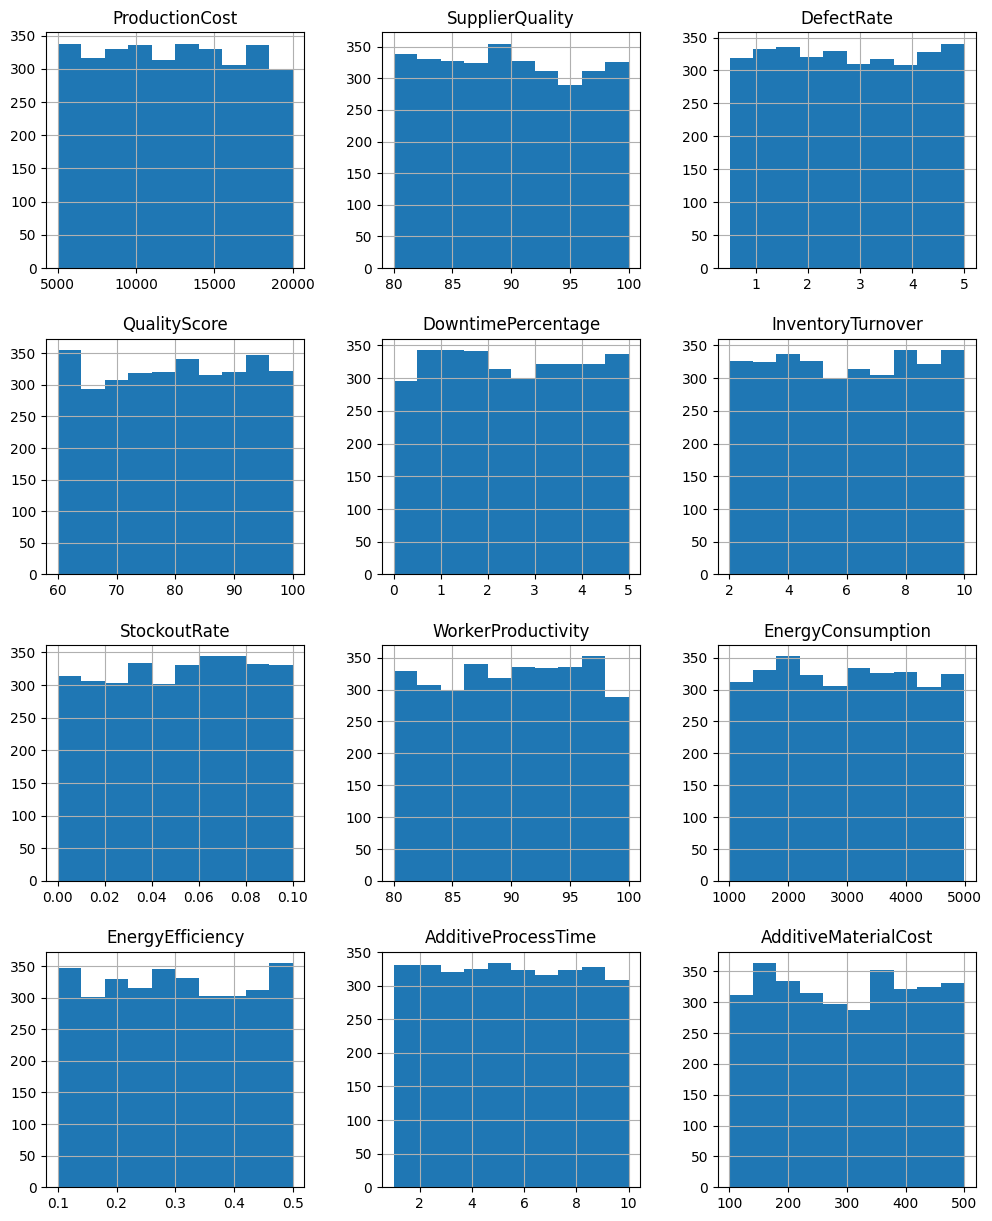

In [13]:
# 연속형 수치 변수 분포 확인 (히스토그램)
df[cols].hist(figsize=(12, 15));

## 고유값 비율 및 수치 분포 분석

- 다수 컬럼에서 `n_unique == total_rows`로 확인됨  
  → 모든 행이 서로 다른 값을 가지며 `unique_ratio = 1.0`

- `df[cols] % 1` 결과, 모든 값이 소수점 이하를 포함  
  → **연속형 수치 변수**의 특성 확인

- 히스토그램 분포 확인 결과  
  → 특정 값에 치우치지 않고 전 구간에 **고르게 분포**

---

### 정리
> 해당 컬럼들은 모든 행에서 고유값을 가지는 연속형 수치 변수로, 분포가 고르게 나타나며 식별자보다는 분석 및 모델링용 변수로 활용하는 것이 적절


In [15]:
# 3. 특정 컬럼에서 0 값 집중 현상
# DeliveryDelay(납품 지연) 분석: 0값 집중 현상
delivery_zero = df[df["DeliveryDelay"] == 0]
delivery_zero

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
11,314,15992.023171,85.704116,0,0.906434,82.750764,3,4.179166,3.547396,0.050271,97.902655,6,2449.983915,0.395103,3.845701,159.556881,0
13,558,13855.215357,89.112991,0,2.655683,87.885593,15,3.067755,2.502169,0.030921,83.361403,5,2724.534713,0.316412,1.664515,469.319673,1
18,763,18099.843738,98.492836,0,4.574179,70.492634,3,2.976789,8.519867,0.043902,88.830885,8,4115.050433,0.474324,6.098026,367.657171,1
23,443,5139.974297,90.928141,0,1.216774,87.737034,21,4.106459,7.889648,0.045000,81.384373,1,1141.266434,0.452358,5.589833,483.005395,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3218,221,6592.405303,93.924429,0,0.927194,71.784732,18,4.798201,9.597768,0.071799,83.804120,7,1365.442444,0.162718,9.338606,446.763811,1
3220,321,8597.299283,88.824593,0,4.967665,71.866287,2,0.789971,2.691728,0.070949,86.611204,6,2276.617840,0.209368,3.790022,219.311116,0
3221,730,7924.374072,81.300016,0,3.552920,71.252419,7,3.567095,4.432105,0.006831,98.643540,5,1050.705670,0.373879,7.779892,349.325427,0
3222,138,12573.671769,96.506168,0,3.785338,95.598584,17,0.372759,9.578340,0.058719,90.237411,5,1880.813147,0.138971,7.864565,327.439454,1


In [16]:
# MaintenanceHours(유지보수 시간) 분석: 0값 집중 현상
maintenance_zero = df[df["MaintenanceHours"] == 0]
maintenance_zero

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
9,221,12587.790394,92.015843,2,2.425283,97.507284,0,2.633960,5.933418,0.032955,85.316362,6,3023.891555,0.317071,5.965972,364.638176,0
31,559,13326.274240,99.273704,1,4.362311,83.255396,0,3.582743,5.573342,0.024584,84.365553,5,3536.649937,0.227936,8.774996,343.609409,1
63,415,13823.034004,84.181947,5,1.127871,78.749341,0,2.632594,4.186538,0.099288,84.813759,9,1348.046903,0.483986,4.036006,239.259739,0
64,113,12214.593348,82.607063,3,3.995457,75.946372,0,0.271342,6.926099,0.076062,99.205886,3,4169.988130,0.179737,9.801130,242.295806,1
77,134,5878.263939,87.759455,0,4.600653,66.446548,0,0.199368,3.192018,0.072096,93.053699,4,3148.603026,0.158998,7.031118,278.618461,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3103,383,19509.067856,82.540672,0,4.992364,86.675811,0,2.420274,7.451800,0.084932,83.374436,5,2965.796924,0.375456,3.379578,185.982407,1
3131,763,6026.610639,81.938347,4,2.273600,74.482234,0,3.959482,7.151970,0.031329,90.760166,3,2004.276534,0.404616,5.433648,274.707572,1
3153,451,5622.459883,85.036294,2,1.918574,92.903349,0,3.506365,4.705598,0.072442,83.162096,3,2701.035674,0.468082,4.720138,311.142156,1
3212,271,12770.156471,85.973443,4,1.236388,63.979977,0,0.342967,2.225484,0.072739,96.278855,9,2924.806299,0.263127,5.068658,424.534448,0


In [17]:
# SafetyIncidents(안전 사고) 분석: 0값 집중 현상
safety_zero = df[df["SafetyIncidents"] == 0]
safety_zero

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
38,574,5078.444203,82.522306,5,0.709610,91.927320,14,1.922919,5.436329,0.062104,99.719070,0,1249.143795,0.233160,1.385992,121.861233,1
40,610,5529.670324,95.326944,0,4.326344,75.837644,7,3.042016,6.592977,0.048186,97.358466,0,2155.754870,0.198748,1.459110,340.836789,1
45,289,9903.974245,92.470106,1,4.304386,60.369693,14,2.252770,7.270545,0.046667,98.859494,0,3965.047199,0.116555,2.499178,109.575787,1
51,931,11729.159464,93.527967,2,4.558272,79.533526,5,2.819536,7.557000,0.076277,97.780148,0,3776.045118,0.136193,1.726307,325.695075,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,792,6274.494348,83.787218,2,3.006008,66.509964,12,2.507033,2.714044,0.090030,82.311582,0,1525.104806,0.456529,2.346620,182.004743,1
3209,889,12275.269813,80.583413,0,1.336835,85.967571,17,4.543595,2.421940,0.012686,80.194119,0,1347.559750,0.298494,2.044609,419.249009,1
3210,513,6281.045452,92.102032,3,4.592865,69.769579,4,1.366489,7.313447,0.087001,90.871824,0,1085.662155,0.179532,9.893978,441.091609,1
3223,596,16531.206970,82.518813,4,1.458128,98.684847,4,2.414457,2.781501,0.059755,96.942531,0,4150.092564,0.428739,3.051196,315.302688,0


## 특정 컬럼에서 0 값 집중 현상
## 분석 대상 변수
- **DeliveryDelay**: 납품 지연 일수  
- **MaintenanceHours**: 유지보수 소요 시간  
- **SafetyIncidents**: 안전 사고 발생 횟수  

납품 지연이 발생하지 않은 정상 납품 사례, 유지보수가 필요하지 않았던 운영 사례, 안전 사고가 발생하지 않은 안전한 운영 사례로 구성
> 따라서 해당 0값들은 결측치, 입력 오류, 의미 없는 값이 아닌 정상적이고 의미 있는 관측값으로 판단
---

## 정리
> 0값 집중 현상은 데이터 품질 문제라기보다 실제 운영 환경의 특성이 반영된 결과로 해석
> 핵심적인 의미를 가지는 값이므로 분석 대상에서 제외하지 않음

In [24]:
# DefectStatus(목표 변수) 분석 전 변수 간 상관관계 분석
corr = (df.corr(numeric_only=True))
corr

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
ProductionVolume,1.000000,0.029584,-0.026559,0.016193,-0.019360,0.017826,-0.004554,0.019905,0.006947,-0.002637,0.004754,-0.024195,-0.010213,0.009923,-0.042393,-0.002980,0.128973
ProductionCost,0.029584,1.000000,-0.024103,0.017365,0.014428,-0.001603,0.007333,-0.004078,0.022749,0.006006,0.005030,-0.006958,-0.006728,-0.002778,0.011075,-0.002114,0.026720
SupplierQuality,-0.026559,-0.024103,1.000000,0.014233,0.012157,-0.029330,-0.019626,0.006298,0.018228,-0.001393,-0.017389,0.004552,-0.003582,-0.011614,-0.012507,-0.002430,0.038184
DeliveryDelay,0.016193,0.017365,0.014233,1.000000,-0.023024,0.017268,0.018144,0.046247,0.006685,-0.002767,-0.013869,0.006030,0.007233,0.029468,0.028085,-0.007601,0.005425
DefectRate,-0.019360,0.014428,0.012157,-0.023024,1.000000,-0.036350,-0.008687,-0.011208,-0.014148,0.007547,-0.000388,0.012196,0.005297,-0.014168,-0.028426,0.011596,0.245746
QualityScore,0.017826,-0.001603,-0.029330,0.017268,-0.036350,1.000000,-0.013366,-0.000505,-0.000618,-0.035049,0.004591,0.001293,-0.001694,-0.004147,0.009986,-0.021223,-0.199219
MaintenanceHours,-0.004554,0.007333,-0.019626,0.018144,-0.008687,-0.013366,1.000000,-0.020494,0.012758,0.019251,0.009622,0.009174,0.007017,-0.026486,-0.001820,-0.000845,0.297107
DowntimePercentage,0.019905,-0.004078,0.006298,0.046247,-0.011208,-0.000505,-0.020494,1.000000,0.010176,0.001578,-0.037814,0.003673,0.003447,0.012885,-0.008031,0.002355,0.004128
InventoryTurnover,0.006947,0.022749,0.018228,0.006685,-0.014148,-0.000618,0.012758,0.010176,1.000000,0.026002,0.001469,-0.017555,0.026336,0.025029,0.019967,0.000176,0.006733
StockoutRate,-0.002637,0.006006,-0.001393,-0.002767,0.007547,-0.035049,0.019251,0.001578,0.026002,1.000000,-0.035034,0.031724,-0.000690,0.025852,0.000870,-0.020563,0.040574


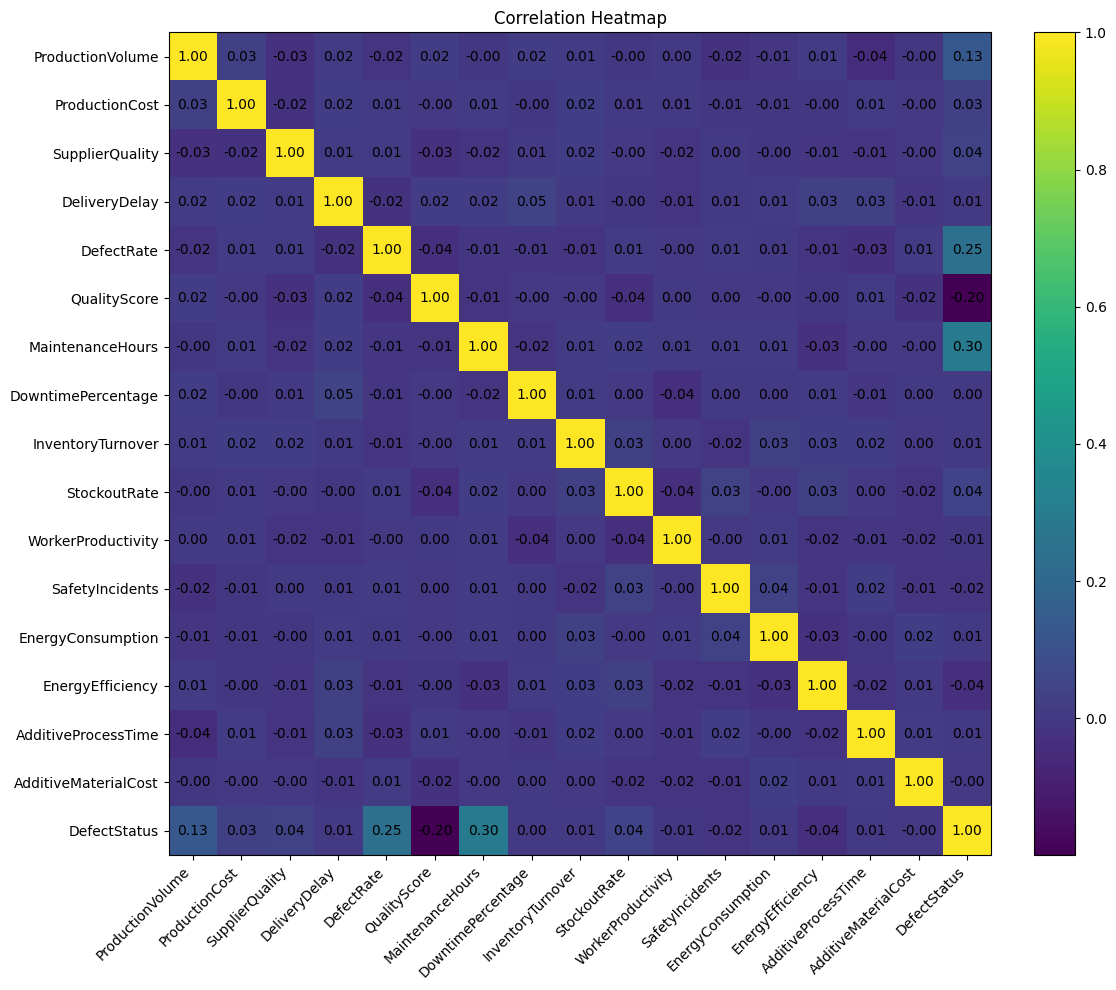

In [25]:
# 컬럼별 상관관계 분석 시각화
# 1) 숫자형만 상관계수 계산
corr = df.select_dtypes(include="number").corr()

# 2) 히트맵 그리기
fig, ax = plt.subplots(figsize=(12, 10))
im = ax.imshow(corr.values)

# 축 라벨
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.index)))
ax.set_xticklabels(corr.columns, rotation=45, ha="right")
ax.set_yticklabels(corr.index)

# 컬러바
plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# 3) 숫자(상관계수) 표시
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha="center", va="center")

ax.set_title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [26]:
# 4. 목표 변수(DefectStatus) 중심 분석
# 기준 컬럼
target_col = "DefectStatus"

# DefectStatus 상관관계 분석
corr_with_target = (
    df.select_dtypes(include="number")
      .corr()[target_col]
      # 기준 컬럼 자신 제거
      .drop(target_col)
      .sort_values(ascending=False)
)

corr_with_target

MaintenanceHours        0.297107
DefectRate              0.245746
ProductionVolume        0.128973
StockoutRate            0.040574
SupplierQuality         0.038184
ProductionCost          0.026720
InventoryTurnover       0.006733
AdditiveProcessTime     0.005619
DeliveryDelay           0.005425
EnergyConsumption       0.005039
DowntimePercentage      0.004128
AdditiveMaterialCost   -0.000953
WorkerProductivity     -0.005224
SafetyIncidents        -0.016039
EnergyEfficiency       -0.035031
QualityScore           -0.199219
Name: DefectStatus, dtype: float64

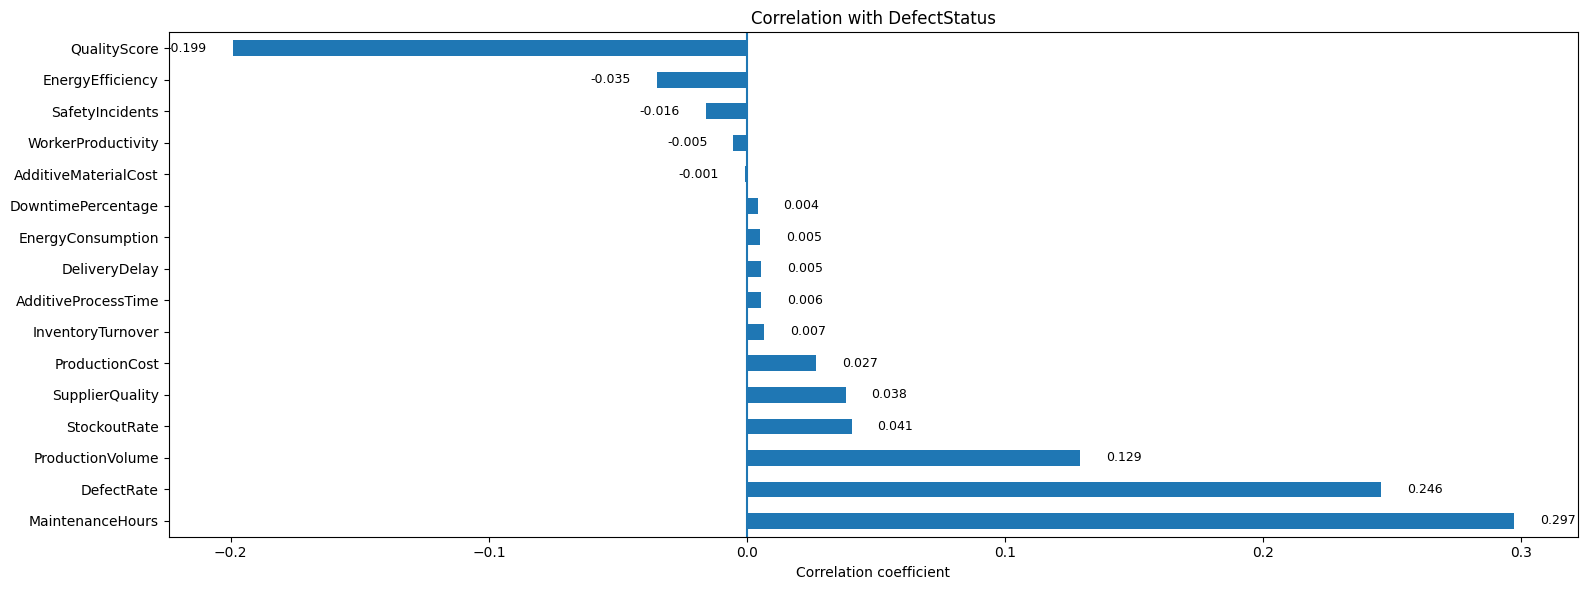

In [39]:
# DefectStatus 상관관계 분석
plt.figure(figsize=(16, 6))

ax = corr_with_target.plot(kind="barh")

# 기준선
plt.axvline(0)

# 수치 라벨 추가
for i, v in enumerate(corr_with_target.values):
    ax.text(
        v + (0.01 if v >= 0 else -0.01), 
        i,
        f"{v:.3f}",
        va="center",
        ha="left" if v >= 0 else "right",
        fontsize=9
    )

plt.title(f"Correlation with {target_col}")
plt.xlabel("Correlation coefficient")
plt.tight_layout()
plt.show()

In [24]:
# 결함 수준(0 / 1)에 따른 데이터 비율 확인
df["DefectStatus"].value_counts(normalize=True)

DefectStatus
1    0.840432
0    0.159568
Name: proportion, dtype: float64

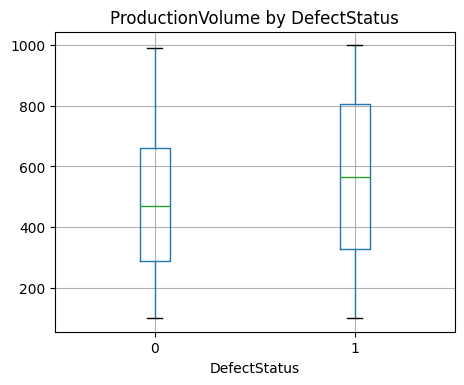

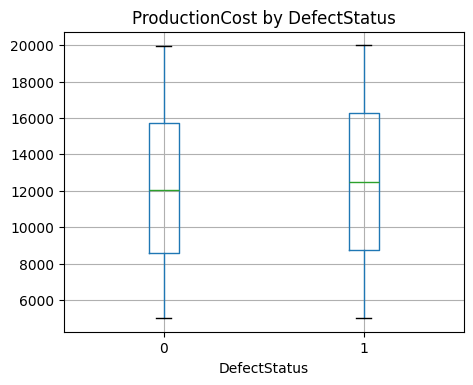

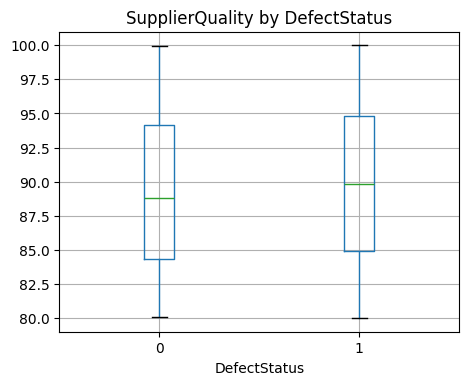

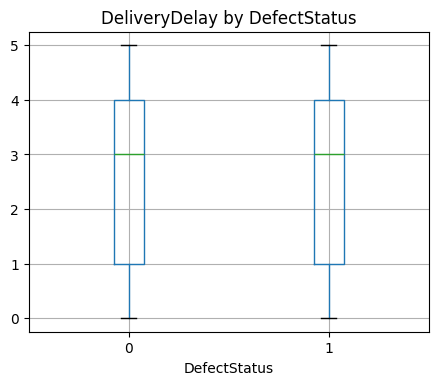

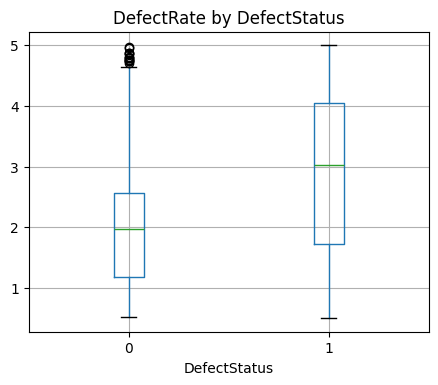

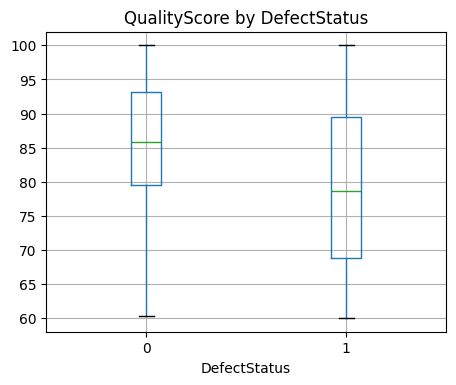

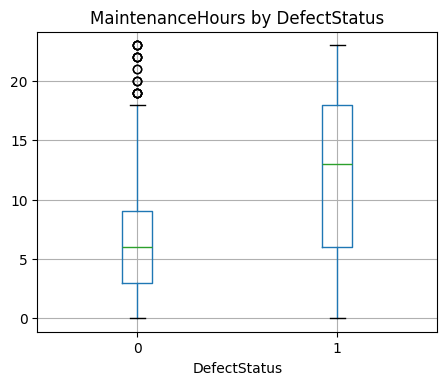

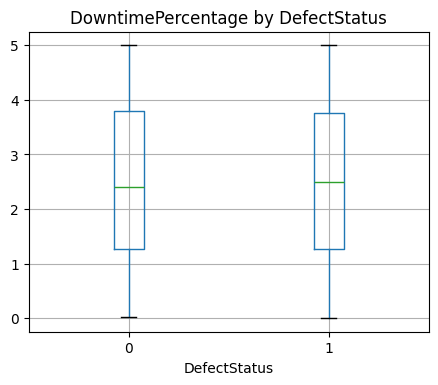

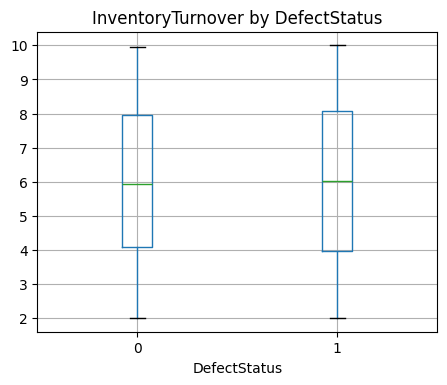

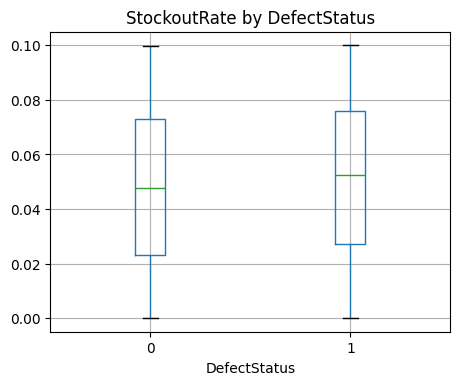

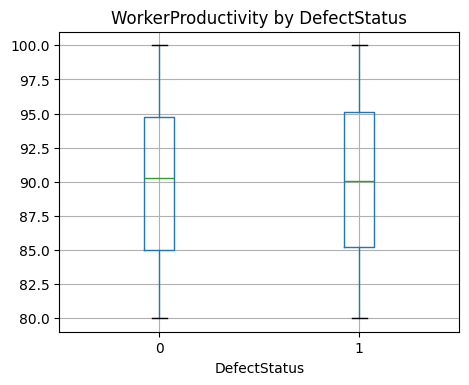

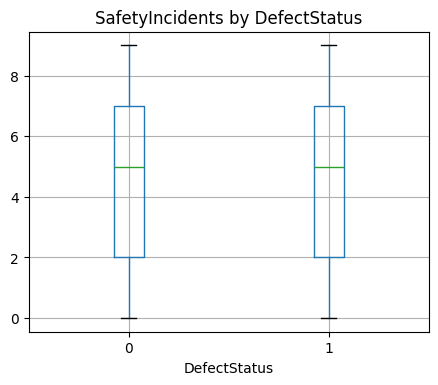

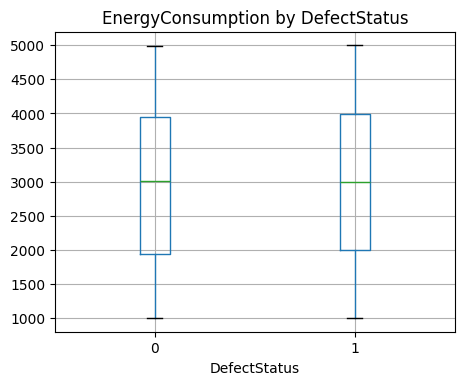

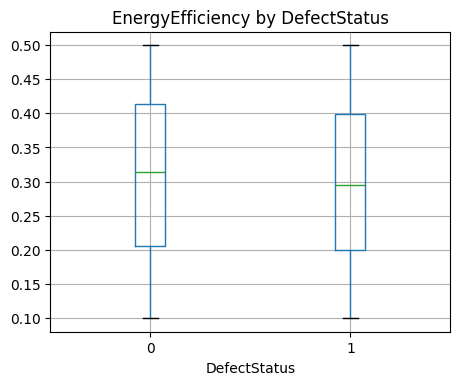

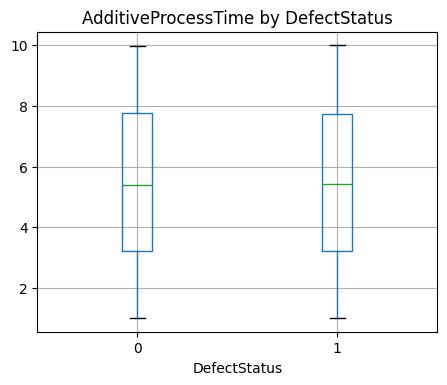

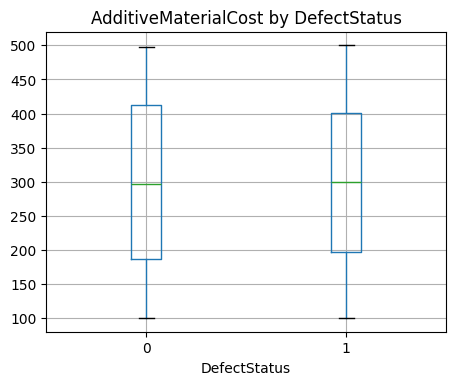

In [20]:
# 결함 수준(0 / 1)에 따른 생산·운영·품질 지표 컬럼 분포 시각화
numeric_cols = df.select_dtypes(include="number").columns

for col in numeric_cols:
    # 목표 변수는 제외
    if col != "DefectStatus":
        df.boxplot(column=col, by="DefectStatus", figsize=(5, 4))
        plt.title(f"{col} by DefectStatus")
        plt.suptitle("")
        plt.show()

In [21]:
#결함 수준에 따라 주요 생산·운영·품질 지표의 평균값 차이 분석
mean_by_defect = (df.groupby("DefectStatus").mean(numeric_only=True))
mean_by_defect

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost
DefectStatus,,,,,,,,,,,,,,,,
0,470.866538,12158.877326,89.328686,2.537718,2.010328,85.442375,6.791103,2.487697,5.983667,0.048197,90.108731,4.698259,2975.158109,0.309132,5.438599,299.769855
1,563.267352,12473.169403,89.929096,2.562982,2.889386,79.126454,12.366140,2.503970,6.026496,0.051387,90.027088,4.571429,2991.026547,0.298000,5.478459,299.467182


In [22]:
# 결함 수준에 따른 수치형 변수들의 평균 계산
mean_by_defect = df.groupby("DefectStatus").mean(numeric_only=True)
# 결함 수준 = 1(불량)과 0(정상) 간 평균 차이 계산
diff = mean_by_defect.loc[1] - mean_by_defect.loc[0]
diff.sort_values(ascending=False)

ProductionCost          314.292076
ProductionVolume         92.400814
EnergyConsumption        15.868438
MaintenanceHours          5.575038
DefectRate                0.879057
SupplierQuality           0.600410
InventoryTurnover         0.042829
AdditiveProcessTime       0.039860
DeliveryDelay             0.025264
DowntimePercentage        0.016273
StockoutRate              0.003190
EnergyEfficiency         -0.011133
WorkerProductivity       -0.081643
SafetyIncidents          -0.126831
AdditiveMaterialCost     -0.302673
QualityScore             -6.315922
dtype: float64

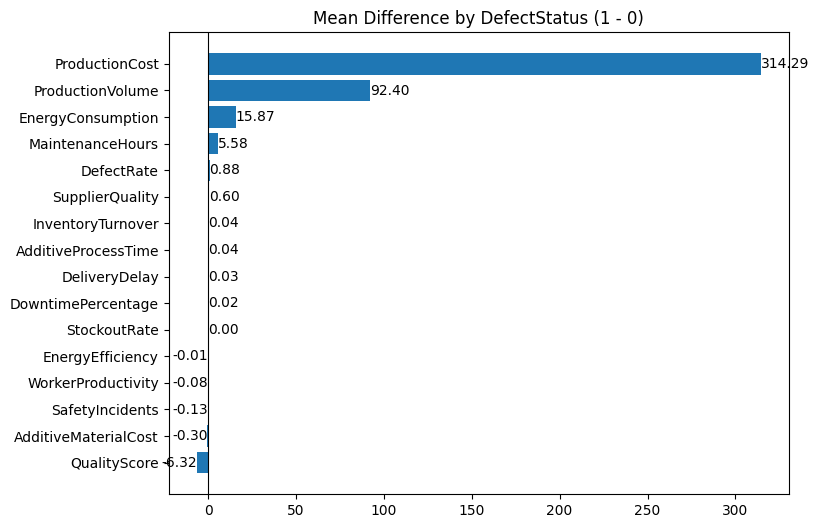

In [23]:
# 결함 수준에 따른 수치형 변수들의 평균 계산 시각화
fig, ax = plt.subplots(figsize=(8, 6))

diff_sorted = diff.sort_values()

bars = ax.barh(diff_sorted.index, diff_sorted.values)

# 숫자 라벨 추가
for bar in bars:
    width = bar.get_width()
    ax.text(
        width,
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va="center",
        ha="left" if width >= 0 else "right"
    )

ax.axvline(0, color="black", linewidth=0.8)
ax.set_title("Mean Difference by DefectStatus (1 - 0)")
plt.show()

# DefectStatus(목표 변수) 분석

## DefectStatus와 수치형 변수 간 상관관계 분석
- DefectStatus와 다른 수치형 변수들 간의 **상관계수는 전반적으로 매우 낮음**
- 선형 상관관계 기준으로는  
  **결함 수준과 특정 지표 간 뚜렷한 관계를 확인하기 어려움**

> 단순 상관계수만으로는 DefectStatus를 설명할 수 있는 핵심 변수를 도출하기 어려움

---

## DefectStatus 데이터 분포 확인
- DefectStatus 분포를 확인한 결과,
  **결함 수준 1(높음)이 압도적으로 많은 불균형 구조** 확인

---

## DefectStatus별 평균값 차이 분석
- 결함 수준에 따른 주요 생산·운영·품질 지표의 평균값 차이를 분석한 결과,
- **DefectStatus = 1(결함 수준 높음)일 때 평균값이 더 높게 나타남**

그러나,
- DefectStatus = 1 데이터 비율이 압도적으로 높아
- 평균값 자체가 **데이터 비율에 의해 왜곡되었을 가능성** 존재
- 평균 차이가 미미한 변수들 역시
  **불균형 데이터 구조로 인해 신뢰도 확보가 어려움**

> 해당 평균 비교 결과를 결함 발생의 직접적인 원인 또는 영향으로 해석하기에는 한계가 있음

---

## 정리

- **결함 수준 1이 과도하게 많은 데이터 분포**로 인해 단순 통계량 기반 해석의 신뢰도가 낮아짐

> 본 데이터에서는 단변량 또는 단순 통계 중심의 분석만으로 결함 수준을 설명하거나 예측하기 어렵다고 판단됨
> 결함 수준 0 데이터 확보 또는 보강 필요

> DefectStatus 데이터는 심각한 클래스 불균형을 가지고 있으며,  
> 단순 상관관계·분포·평균 비교만으로는  
> 결함 수준을 신뢰성 있게 설명하기 어려움


In [43]:
# EDA 수행한 데이터 csv로 저장
df.to_csv("manufacturing_defect_dataset.csv", index=False, encoding="utf-8-sig")
print("manufacturing_defect_dataset.csv로 저장하였습니다.")

manufacturing_defect_dataset.csv로 저장하였습니다.


# EDA 결과 요약

## 식별자(PK) 컬럼 생성
- 각 행을 고유하게 식별하기 위해  
  **`PRODUCTION_ID` 컬럼을 추가하여 Primary Key 역할의 식별자 컬럼 생성**
---

## 컬럼별 고유값 분포 확인
- 다수의 컬럼에서 **고유값이 매우 많이 존재**함을 확인
- 고유값 발생 원인을 추적한 결과,
  - 대부분 **연속형 수치 변수(Continuous Numeric Variables)** 로 판단
- 범주형 변수로 오인할 수 있는 컬럼들도
  실제로는 측정 단위 기반의 수치형 지표임을 확인

---

## 0값 데이터 검증
0값에 해당하는 행들을 실제 의미 기준으로 확인한 결과, 다음과 같은 **정상 운영 사례**로 구성됨:

- 납품 지연이 발생하지 않은 **정상 납품 사례**
- 유지보수가 필요하지 않았던 **안정적 운영 사례**
- 안전 사고가 발생하지 않은 **무사고 운영 사례**

> 따라서 해당 0값들은 **정상적이고 의미 있는 관측값** 으로 판단

---

## DefectStatus 기준 분석 결과

### 단변량 및 단순 통계 기반 분석 한계
- DefectStatus(결함 수준)를 기준으로
  - 상관관계 분석
  - 분포 비교
  - 평균값 비교
  등을 수행한 결과,

본 데이터에서는
단변량 또는 단순 통계 중심의 분석만으로  
결함 수준을 명확히 설명하거나 예측하기 어렵다고 판단

- **데이터 불균형** 존재

---

## 분석 방향 조정

### 기존 접근 방식의 한계
- 개별 컬럼 단위 분석으로는
  결함 발생 메커니즘을 충분히 설명하기 어려움
- 단순 지표 비교는
  실제 운영 맥락을 반영하지 못할 가능성 존재

---

### 분석 전략 전환
이에 따라 분석 방향을 다음과 같이 조정함:

- **개별 컬럼 중심 분석 → 파생 컬럼 중심 분석**
- **원시 지표 비교 → 집계 및 요약 지표 기반 분석**
---

## 요약

- PRODUCTION_ID 생성으로 데이터 식별 구조 확보
- 대부분의 컬럼은 연속형 수치 변수로 확인
- 0값 집중 현상은 데이터 오류가 아닌 정상 운영 상태 반영
- DefectStatus 분석 시 단변량·단순 통계 접근의 한계 확인
- **파생 컬럼 생성 및 집계 중심 분석으로 방향 전환**